# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [107]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [108]:
# Remove rows if AVG_MATH_8_SCORE are missing
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_8_SCORE

How many years of data are logged in our dataset? 

In [100]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [101]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].mean().loc[["MICHIGAN", "OHIO"]]
# Ohio is higher

STATE
MICHIGAN    276.166667
OHIO        282.250000
Name: AVG_MATH_8_SCORE, dtype: float64

Find the average for your outcome score across all states in 2019

In [102]:
df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [103]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [110]:
# find missing math4 scores
nan_math4 = df['AVG_MATH_4_SCORE'].isna()
# compute ratio of avg math 8 scores when missing math4 and not missing math4
math4_ratio = df['AVG_MATH_8_SCORE'][nan_math4].mean()/  df['AVG_MATH_8_SCORE'][~nan_math4].mean()
# fill in missing math4 by the mean math4 * math4_ratio
df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].mean() * math4_ratio, inplace=True)

# find missing reading8 scores
nan_reading8 = df['AVG_READING_8_SCORE'].isna()
# compute ratio of avg math 8 scores when missing reading8 and not missing reading8
reading8_ratio = df['AVG_MATH_8_SCORE'][nan_reading8].mean()/  df['AVG_MATH_8_SCORE'][~nan_reading8].mean()
# fill in missing reading by the mean reading * reading8_ratio
df['AVG_READING_8_SCORE'].fillna(df['AVG_READING_8_SCORE'].mean() * reading8_ratio, inplace=True)

df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE']/df['ENROLL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].fillna(df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].mean(), inplace=True)

Feature engineering justification:
I chose to use the average math 4 score as kids who are good at math as 4th graders should remain good at math through 8th grade. I found that if the student is missing math 4 scores, then he tends to worse on average in math 8.  So, I filled the missing math 4 scores by the average math 4 scores, but scaled down by the how much worse the missing students did in math 8.

I chose to use average reading 8 scores as kids who are strong readers tend to be stronger students overall, which should make them good at math. I applied the same logic as I did when filling the missing math 4 scores.

I created instruction expenditure per student as schools that spend more on their childrens' education should have higher test scores.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'AVG_MATH_8_SCORE')

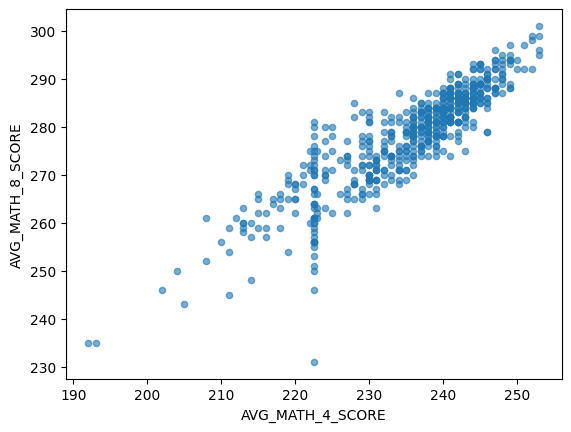

In [111]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('AVG_MATH_4_SCORE')
plt.ylabel('AVG_MATH_8_SCORE')

We can see a strong correlation between the average math 4 score and the average math 8 score. We see a few outliers at the lower end of the x and y-axis, but they follow the relationship of the graph. The drop in average math 8 score around the high 220s is a result of me filling in the missing values of the average math 8 score with the average.

**Visualization 2**

Text(0, 0.5, 'AVG_MATH_8_SCORE')

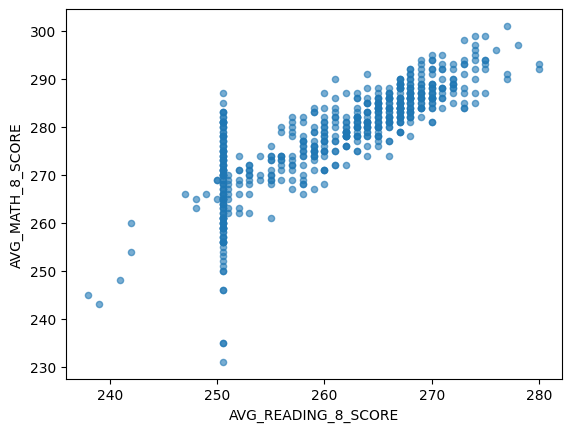

In [112]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('AVG_READING_8_SCORE')
plt.ylabel('AVG_MATH_8_SCORE')

We can see a very strong correlation between the average reading 8 score and the average math 8 score. We see a few outliers again at the lower end of the x and y-axis, but they follow the relationship of the graph. The drop in average math 8 score around the low 250s is a result of me filling in the missing values of the average math 8 score with the average.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [76]:
from sklearn.model_selection import train_test_split

In [113]:
X = df[['AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'INSTRUCTION_EXPENDITURE_PER_STUDENT']]
y = df['AVG_MATH_8_SCORE']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [79]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [80]:
# create your model here
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [117]:
print("score")
print(model.score(X_test, y_test))
print("mean error")
print(np.mean(model.predict(X_test)-y_test))
print("mean abs error")
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print("root mean squared error -- penalizes large errors")
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

score
0.8242122693814908
mean error
-0.31340651020484883
mean abs error
2.956351722328047
root mean squared error -- penalizes large errors
4.17128657969568


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

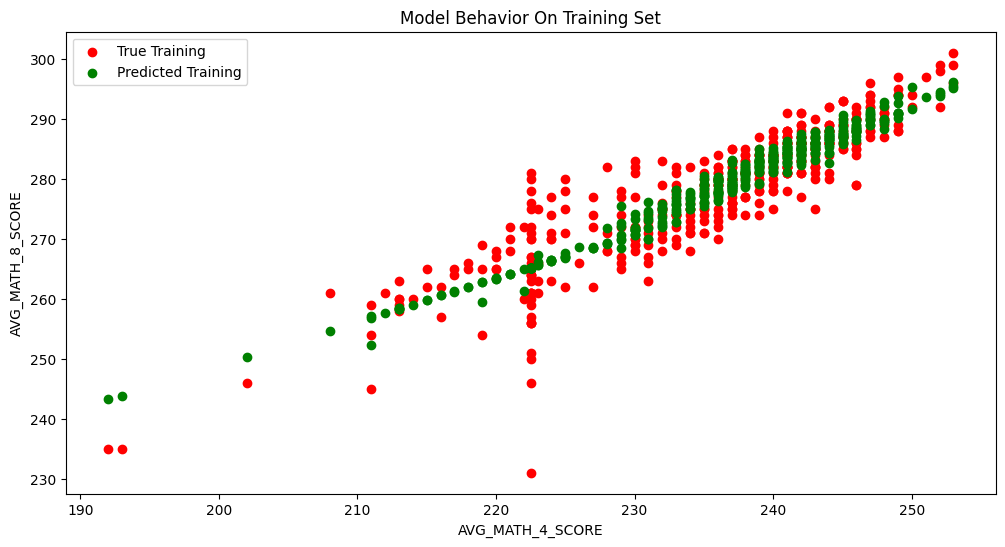

In [118]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

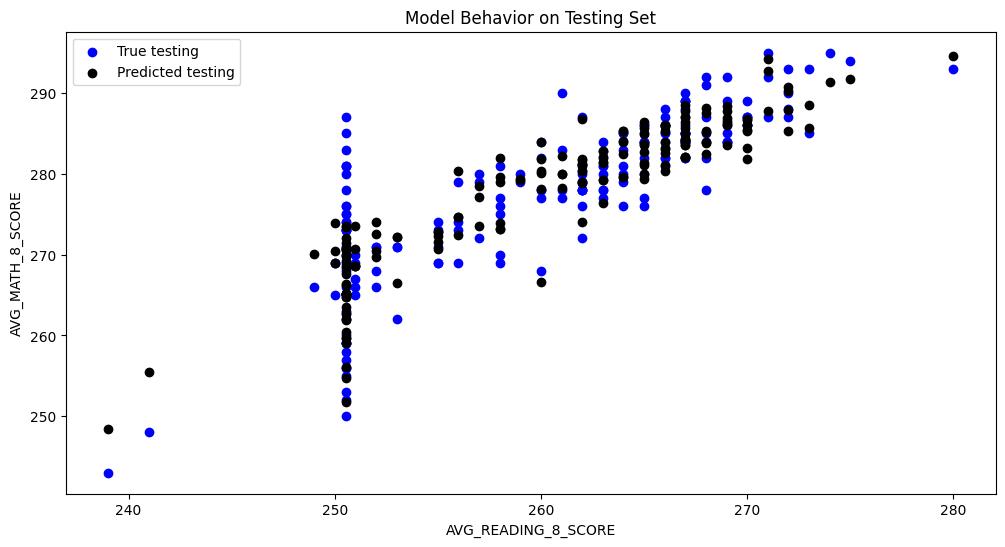

In [119]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I found that there is a strong correlation between math 4 score and math 8 score and a strong correlation between the reading 8 score and the math 8 score. If we look at the graph between average math 4 score and average math 8 score, we can see that the regression line the true values and predicated values are very close. The same applies to the graph between the average reading 8 score and the average math 8 score. If we look at the R^2 score of 0.8242122693814908, we can see that there is a strong correlation between the predicted and true values. If we look at the average absolute error of 2.956351722328047, that is quite low considering the values we are predicting are in the 200s.